In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import klib
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (6) (1).csv', header  = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [70]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [71]:
df.loc[:122,"Region"] = 0 # The first region will be categorized as 0
df.loc[122:, "Region"] = 1 # The second region will be categorized as 1
dataset = df

In [72]:
df[['Region']] = df[["Region"]].astype(int)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [74]:
df.index[df.isnull().any(axis=1)]

Int64Index([122, 167], dtype='int64')

In [75]:
df =df.dropna().reset_index(drop = True)

In [76]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [77]:
df = df.drop(122).reset_index(drop = True)

In [78]:
df = klib.data_cleaning(df,  convert_dtypes = False)

Shape of cleaned data: (243, 14) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['year']
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-0.0%)



In [79]:
df.columns

Index(['day', 'month', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc',
       'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [80]:
df[['day', 'month', 'temperature', 'rh', 'ws']] = df[['day', 'month', 'temperature', 'rh', 'ws']].astype(int)

In [81]:
df[['rain', 'ffmc', 'dmc', 'dc','isi', 'bui', 'fwi']] = df[['rain', 'ffmc', 'dmc', 'dc','isi', 'bui', 'fwi']].astype(float)

In [82]:
df.drop('day',inplace = True, axis = 1)

In [83]:
df.to_csv('Algerian_forest_fire_cleaned')

In [84]:
df['classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [85]:
df['classes']= np.where(df['classes'].str.contains('not fire'), 0,1)
# If classes col contains 'not fire' , assign it to 0 else 1

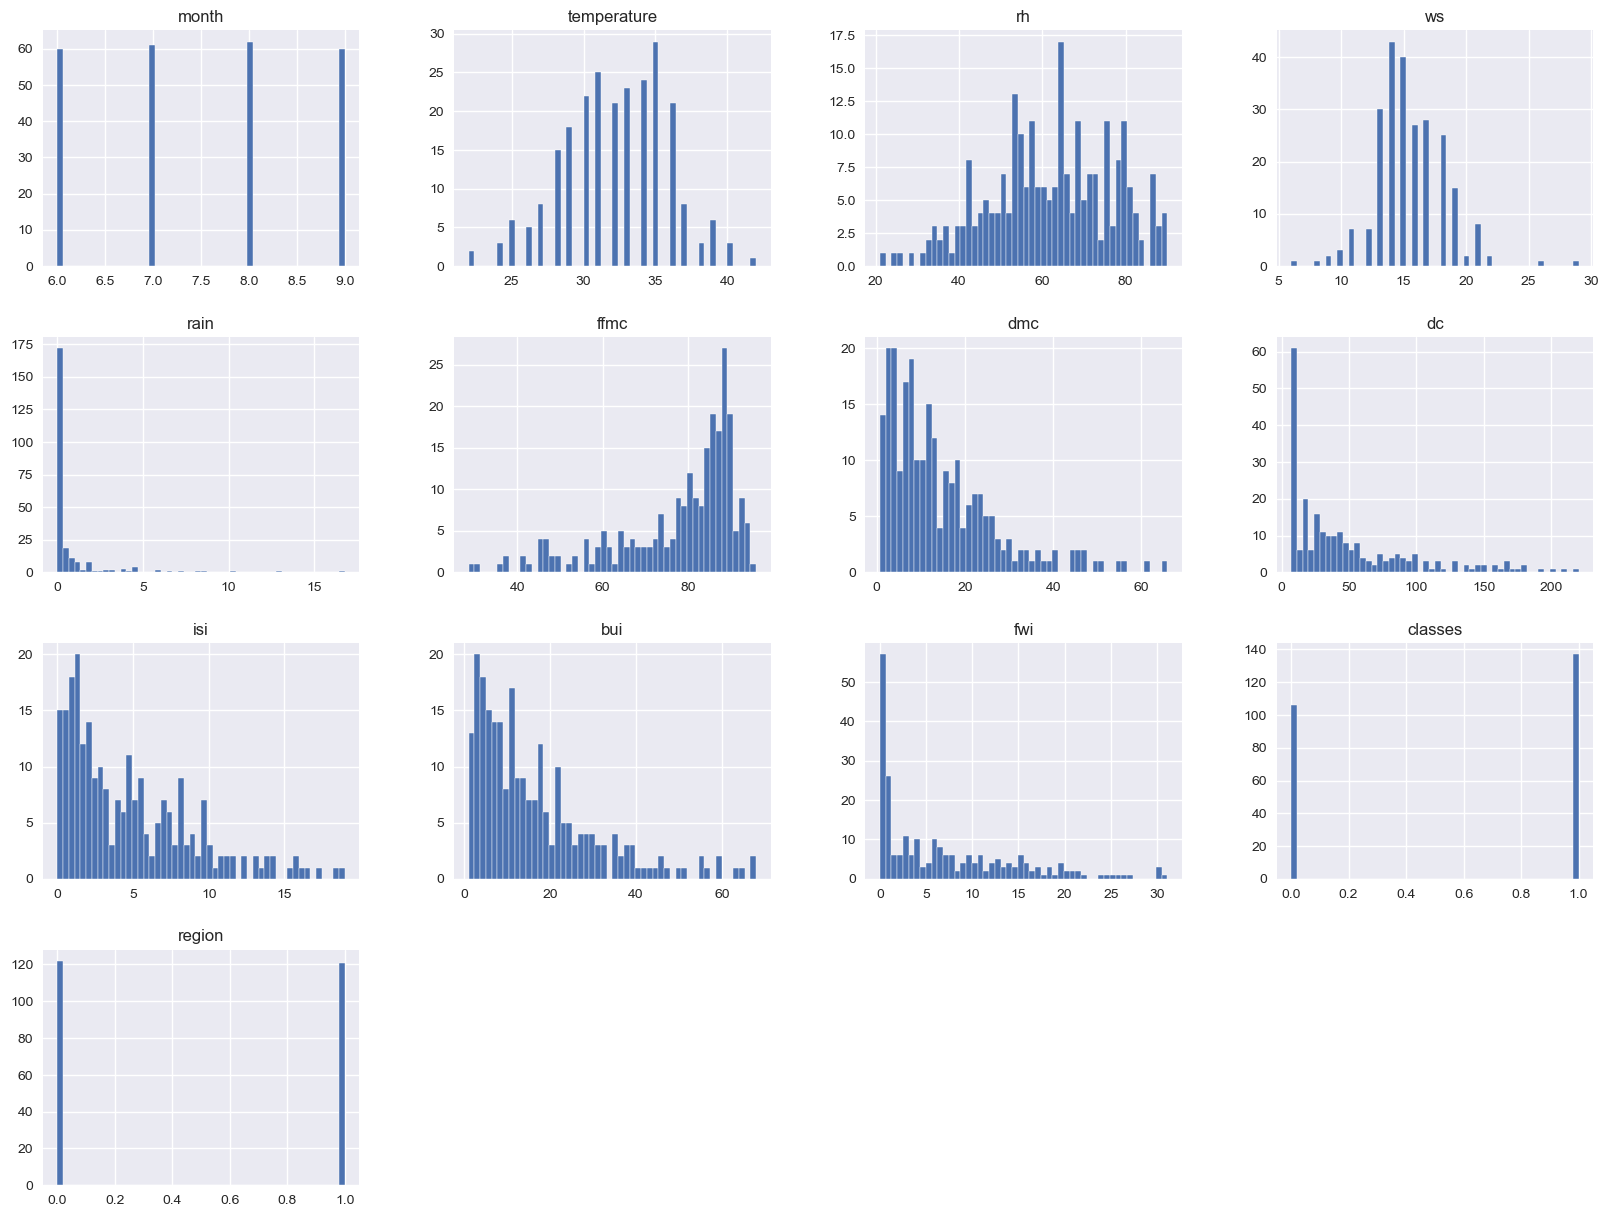

In [86]:
plt.style.use('seaborn')
df.hist(bins = 50, figsize = (20,15))
plt.show()

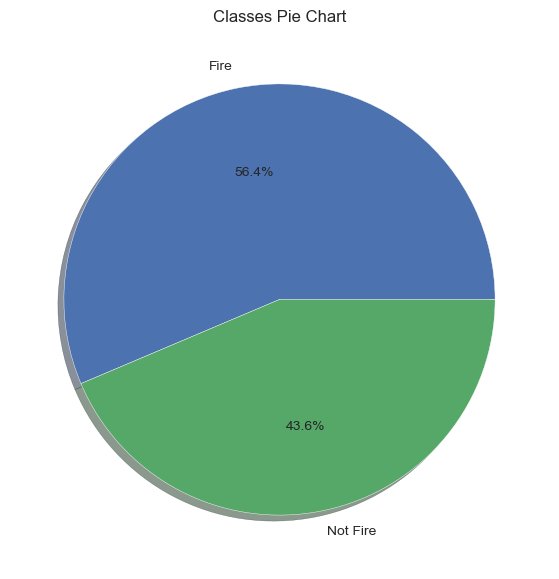

In [87]:
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize = (12,7))
plt.pie(df['classes'].value_counts(), labels = classlabels, autopct = '%1.1f%%',shadow = True)
plt.title('Classes Pie Chart')
plt.show()

In [88]:
df.corr()

,month,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
month,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
temperature,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


<Axes: >

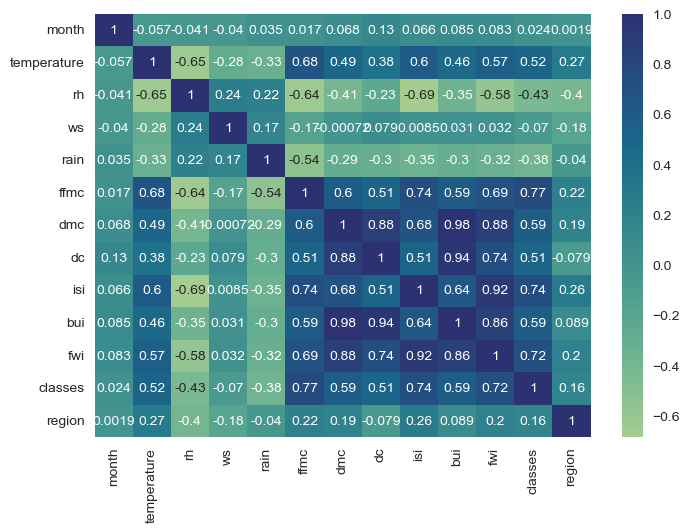

In [89]:
sns.heatmap(df.corr(), annot = True, cmap = 'crest')

### Monthly Fire Analysis

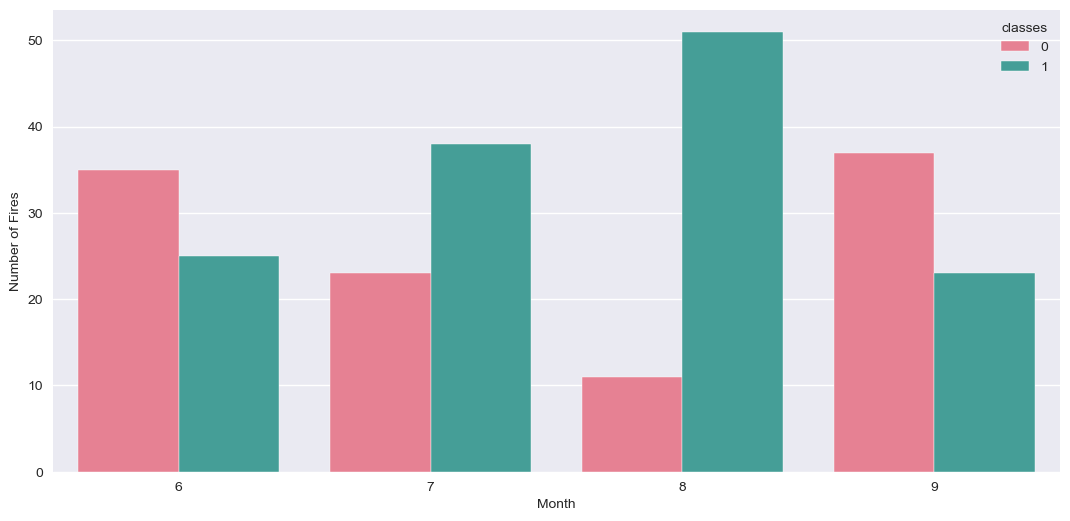

In [90]:
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'classes', data = df, palette='husl')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

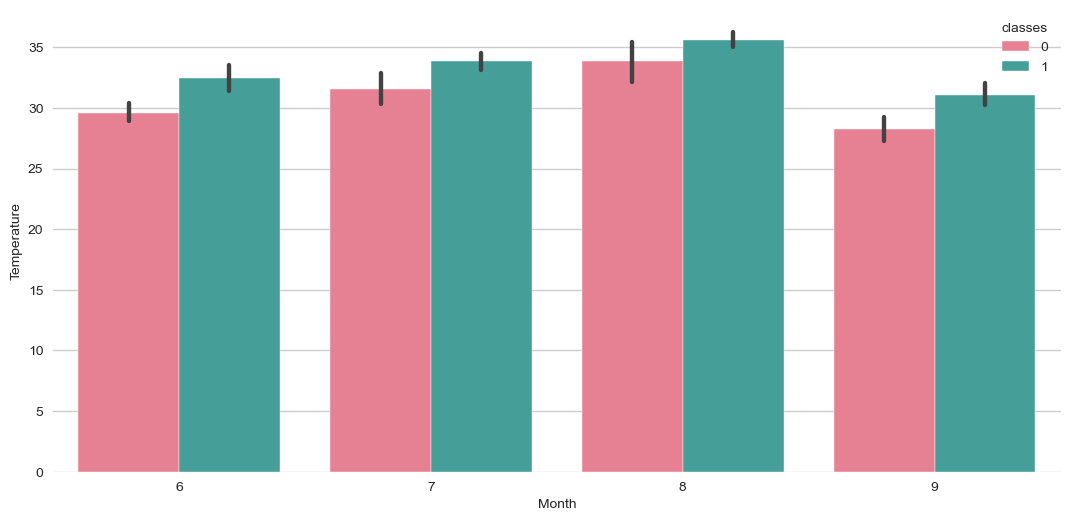

In [91]:
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.barplot(x = 'month',y = 'temperature', hue = 'classes', data = df, palette='husl')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

### Observation: 
We can observe that number of fires increase from June to August as the temperature rises

### Machine Learning

In [92]:
X = df.drop('fwi', axis = 1)
y = df['fwi']
# Splitting independent and dependent features

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [94]:
X_train.corr()

,month,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
month,1.000000,-0.075410,-0.032551,0.040539,0.044531,-0.000986,0.062557,0.112080,0.060130,0.075388,0.025016,0.023692
temperature,-0.075410,1.000000,-0.666832,-0.363524,-0.353372,0.684186,0.485272,0.344520,0.610784,0.447509,0.497727,0.316034
rh,-0.032551,-0.666832,1.000000,0.268542,0.252659,-0.639914,-0.400913,-0.206873,-0.700103,-0.340127,-0.431097,-0.442337
ws,0.040539,-0.363524,0.268542,1.000000,0.219551,-0.238520,-0.026332,0.057709,-0.025648,0.008292,-0.106459,-0.188898
rain,0.044531,-0.353372,0.252659,0.219551,1.000000,-0.588079,-0.300879,-0.306149,-0.351447,-0.310650,-0.377688,-0.076930
ffmc,-0.000986,0.684186,-0.639914,-0.238520,-0.588079,1.000000,0.610152,0.511148,0.736174,0.596990,0.765968,0.275874
dmc,0.062557,0.485272,-0.400913,-0.026332,-0.300879,0.610152,1.000000,0.884202,0.673975,0.982542,0.592269,0.194039
dc,0.112080,0.344520,-0.206873,0.057709,-0.306149,0.511148,0.884202,1.000000,0.489671,0.945585,0.513694,-0.060157
isi,0.060130,0.610784,-0.700103,-0.025648,-0.351447,0.736174,0.673975,0.489671,1.000000,0.632169,0.732387,0.313642
bui,0.075388,0.447509,-0.340127,0.008292,-0.310650,0.596990,0.982542,0.945585,0.632169,1.000000,0.593063,0.094501


<Axes: >

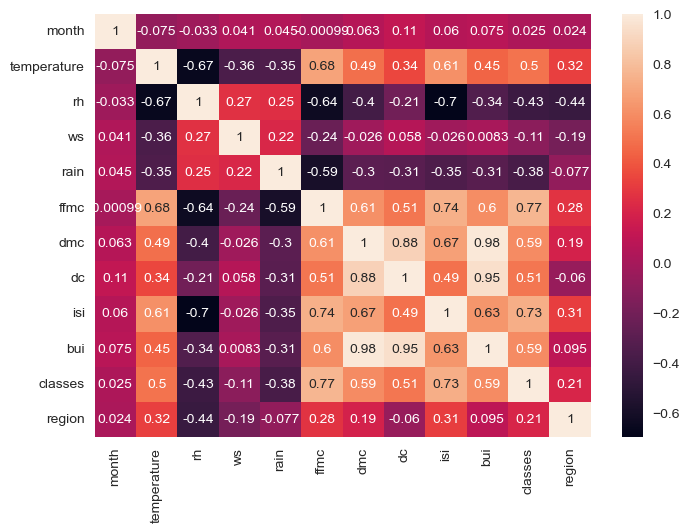

In [95]:
sns.heatmap(X_train.corr(), annot = True)

In [96]:
# Removing the columns with high colinearity to avoid multi-colinearity
def correlation(dataset, threshold):
    cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>= threshold:
                col_name = corr_matrix.columns[i]
                cols.add(col_name)
                
    return cols

In [97]:
corr_features = correlation(X_train, 0.85)
corr_features

{'bui', 'dc'}

In [98]:
X_train.drop(corr_features, inplace = True, axis = 1)
X_test.drop(corr_features, inplace = True, axis = 1)

### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
scaler.fit_transform(X_train)
scaler.fit(X_test)

StandardScaler()

### Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [102]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred = regressor.predict(X_test)

In [104]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6604077837556095
R2_Score : 0.9776964874956054


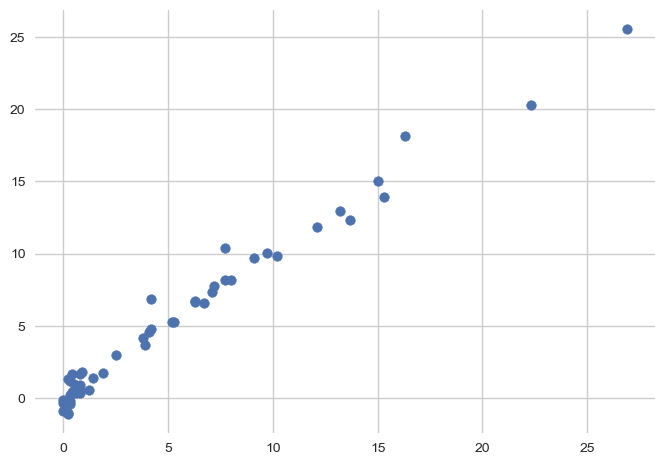

In [105]:
plt.scatter(y_test, y_pred)

### Lasso Regression

In [106]:
from sklearn.linear_model import Lasso

In [107]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [108]:
y_pred = lasso.predict(X_test)

In [109]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.8394706685198764
R2_Score : 0.9639107066663818


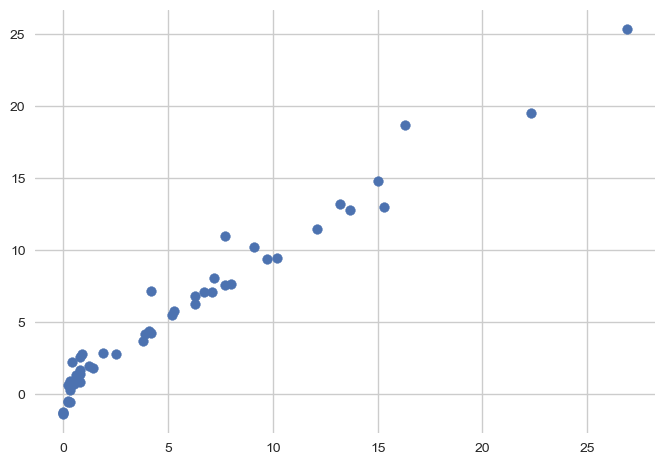

In [110]:
plt.scatter(y_test, y_pred)

### Cross Validation Lasso

In [111]:
from sklearn.linear_model import LassoCV

In [112]:
lassocv = LassoCV(cv = 6)
lassocv.fit(X_train, y_train)

LassoCV(cv=6)

In [113]:
y_pred = lassocv.predict(X_test)

In [114]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6486574645251144
R2_Score : 0.9761661895033689


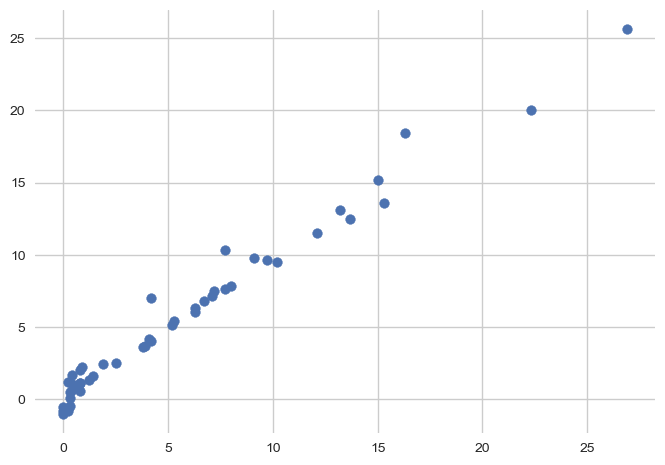

In [115]:
plt.scatter(y_test, y_pred)

### Ridge Regression

In [116]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [117]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [118]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6535649598570857
R2_Score : 0.9777874081093164


### Ridge Cross Vlaidation

In [119]:
from sklearn.linear_model import RidgeCV

In [120]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

In [121]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6247354997127226
R2_Score : 0.9776401190516693


In [122]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### ElasticNet 

In [123]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [124]:
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

In [125]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.8380325381063423
R2_Score : 0.963776678276987


### Pickling the model

In [126]:
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))
# For standard scaling the new data
pickle.dump(ridge, open('ridge.pkl', 'wb'))
# For predicting with the data